Import required libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split


Accessing final_list variable from Onisleme notebook.

In [2]:
%store -r final_list


Extract Features and Labels also create sequential model

In [3]:
model = tf.keras.Sequential()
y = [i[1] for i in final_list] #labels-(class)
x = [i[0] for i in final_list] #features-(image array)
x = np.asarray(x).astype(np.float32)
y = np.array(y)

x_train,x_temp,y_train,y_temp = train_test_split(x,y,train_size = 0.8)
x_test,x_val,y_test,y_val = train_test_split(x_temp,y_temp,test_size=0.5)

model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),strides=(1,2),
                                 padding="same",activation="relu",
                                 input_shape=(256,256,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),strides=(1,2),
                                 padding="same",activation="relu"
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 64, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 32, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 64)                4

Hyperparameter optimization and model training

In [4]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["Accuracy"])
results = model.fit(x_train,y_train,
                    batch_size=64,
                    epochs=20,verbose=1,
                    validation_data=(x_val,y_val))

Epoch 1/20
110/110 [==============================] - 63s 563ms/step - loss: 2.1162 - Accuracy: 0.2196 - val_loss: 1.7409 - val_Accuracy: 0.4153
Epoch 2/20
110/110 [==============================] - 59s 536ms/step - loss: 1.7470 - Accuracy: 0.3656 - val_loss: 1.2814 - val_Accuracy: 0.5950
Epoch 3/20
110/110 [==============================] - 59s 536ms/step - loss: 1.4821 - Accuracy: 0.4740 - val_loss: 1.0958 - val_Accuracy: 0.7048
Epoch 4/20
110/110 [==============================] - 59s 540ms/step - loss: 1.3238 - Accuracy: 0.5258 - val_loss: 1.0223 - val_Accuracy: 0.6888
Epoch 5/20
110/110 [==============================] - 60s 542ms/step - loss: 1.2149 - Accuracy: 0.5569 - val_loss: 0.8755 - val_Accuracy: 0.7620
Epoch 6/20
110/110 [==============================] - 58s 527ms/step - loss: 1.1045 - Accuracy: 0.6047 - val_loss: 0.8262 - val_Accuracy: 0.7483
Epoch 7/20
110/110 [==============================] - 59s 534ms/step - loss: 1.0498 - Accuracy: 0.6066 - val_loss: 0.7426 - val_Ac

Showing Loss and Accuracy Graphs Summary

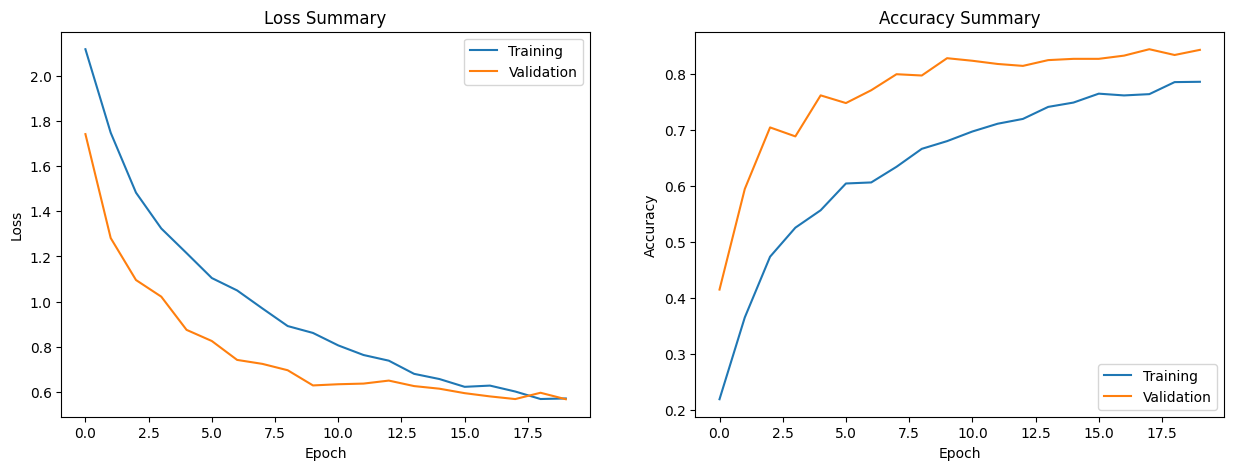

In [5]:
plt.figure(figsize=(15,5))

plt_loss = plt.subplot(121)
plt_loss.plot(results.history["loss"])
plt_loss.plot(results.history["val_loss"])
plt.title("Loss Summary")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")

plt_accuracy = plt.subplot(122)
plt_accuracy.plot(results.history["Accuracy"])
plt_accuracy.plot(results.history["val_Accuracy"])
plt.title("Accuracy Summary")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="lower right")